

## Rozwiązywanie równań nieliniowych 
Funkcje testowe: 
$$f(x) = 2x^2 -2x + 1$$
$$f(x) = -26 + 85x - 91x^2 +44x^3 -8x^4 + x5$$
$$f(x) = 4^x - 3^{2x} + 2^{3x} -1$$
$$f(x) = 3*x + sin(x) - cos^3(x)$$
$$f(x) = 27x^3−3x+1$$

### Zadanie 1:
Zaimplementuj metodą bisekcji. Sprawdź jej działanie na powyższych funkcjach testowych. Dobierz samodzielnie przedział dla poszukiwania miejsca zerowego. Sprawdź dokładnośc metody. 
Oceń szybkość zbieżności dla każdej testowanej funkcji. Zwróć uwagę na sposób doboru E.

In [1]:
import time
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.misc import derivative
from tabulate import tabulate
from scipy import optimize as opt


f_kwadratowa = lambda x: 2*x**2 - 2*x + 1
f_kwadratowa_wzor = "f(x)=2x^2−2x+1"

f_wielomianowa = lambda x: -26 + 85*x - 91*x**2 + 44*x**3 - 8*x**4 + x**5
f_wielomianowa_wzor = "f(x)=−26+85x−91x^2+44x^3−8x^4+x^5"

f_wykladnicza = lambda x: pow(4, x) - pow(3, 2*x) + pow(2, 3*x) - 1
f_wykladnicza_wzor = "f(x)=4^x−3^(2x)+2^(3x)−1"

f_tryg = lambda x: 3*x + math.sin(x) - math.cos(x)**3
f_tryg_wzor = "f(x)=3x+sin(x)−(cos(x))^3"

f_szescienna = lambda x: 27*x**3 - 3*x + 1
f_szescienna_wzor = "f(x)=27x^3−3x+1"


def draw_diagram(fun, a, b, n, func_name):
    x_axis = np.linspace(a, b, n)
    plt.plot(x_axis, np.vectorize(fun)(x_axis), label=func_name)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title(func_name)
    plt.grid()
    plt.show()

def bisection_method(a, b, fun, n):  # n is the max number of allowed iterations
    if fun(a) * fun(b) > 0 or n <= 0 or b < a:
        return "Not found", "Not found"
    else:
        d = b - a
        x_0 = 1
        for i in range(n):
            x_0 = (a + b) / 2.0
            if fun(x_0) == 0:
                e = d / 2**i
                return x_0, e
            elif fun(a) * fun(x_0) < 0:
                b = x_0
            else:
                a = x_0

        e = d / 2**n
        return x_0, e

##### Rysyjemy wykresy dla paru przedziałów, żeby ręcznie wyznaczyć przedziały do obliczania miejsc zerowych

In [2]:
def draw_all_diagrams(a, b):
    draw_diagram(f_kwadratowa, a, b, 100, f_kwadratowa_wzor)
    draw_diagram(f_wielomianowa, a, b, 100, f_wielomianowa_wzor)
    draw_diagram(f_wykladnicza, a, b, 100, f_wykladnicza_wzor)
    draw_diagram(f_tryg, a, b, 100, f_tryg_wzor)
    draw_diagram(f_szescienna,a, b, 100, f_szescienna_wzor)

# Dla wyznaczenia przedziałów do poszukiwania miejsc zerowych

###### Przedział (-100, 100)

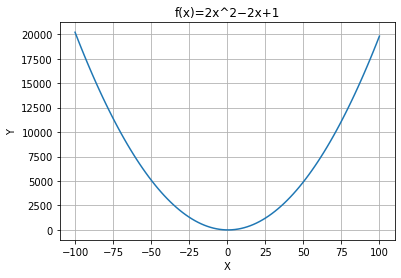

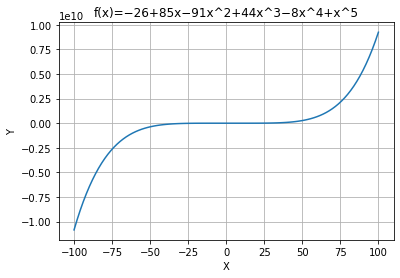

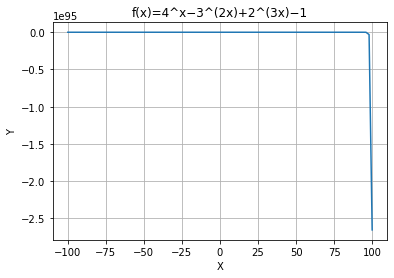

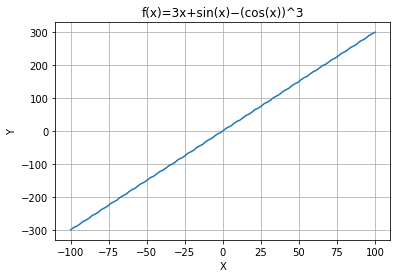

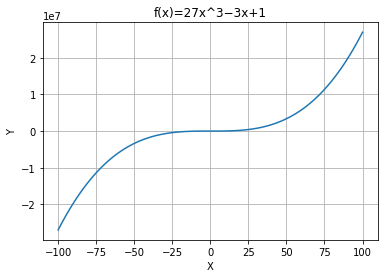

In [3]:
draw_all_diagrams(-100, 100)

###### Przedział (-25, 25)

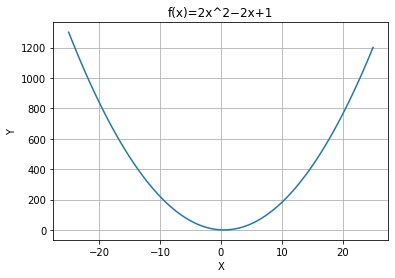

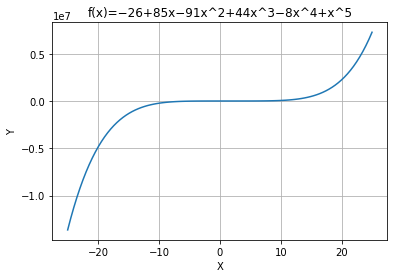

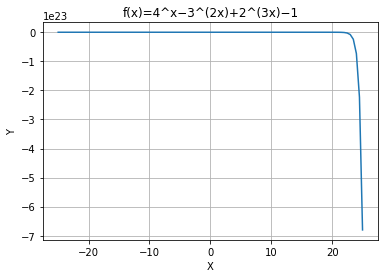

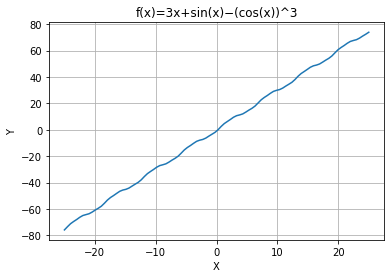

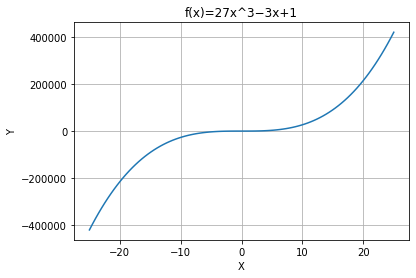

In [4]:
draw_all_diagrams(-25, 25)

###### Przedział (-10, 10)

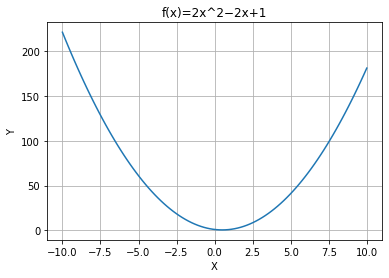

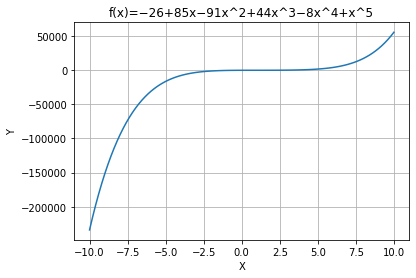

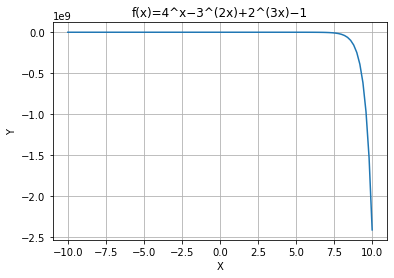

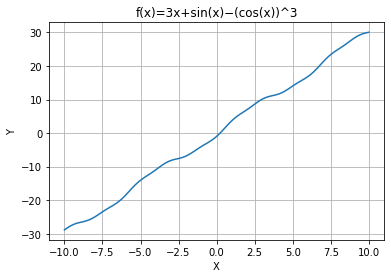

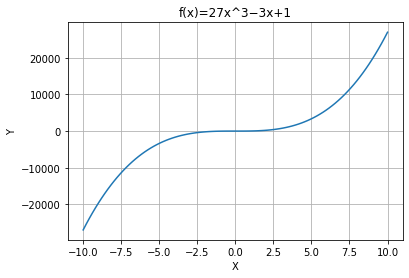

In [5]:
draw_all_diagrams(-10, 10)


###### Przedział (-5, 5)

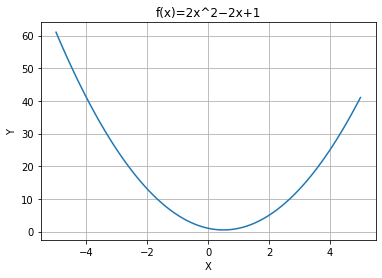

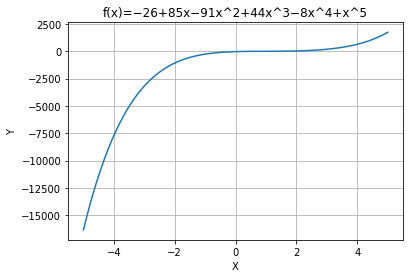

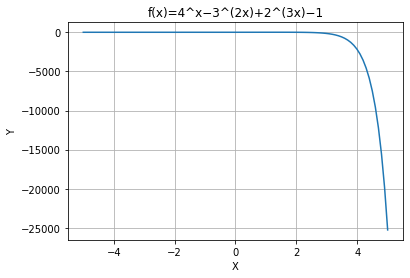

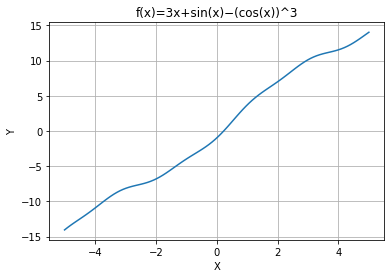

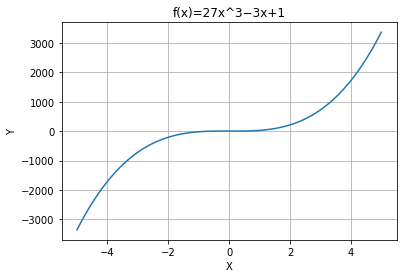

In [6]:
draw_all_diagrams(-5, 5)


###### Przedział (-2, 2)

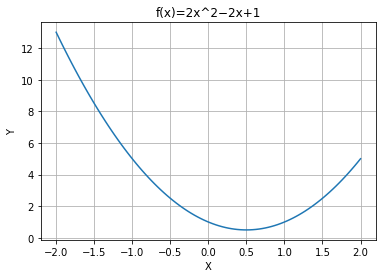

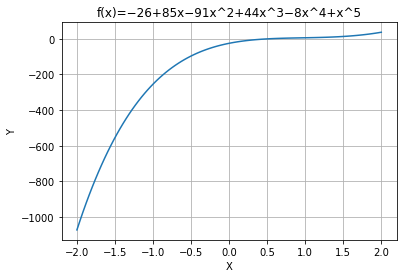

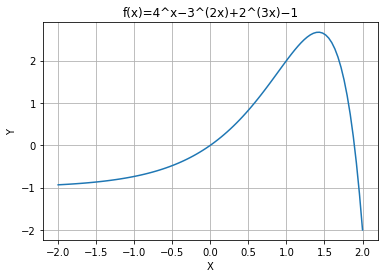

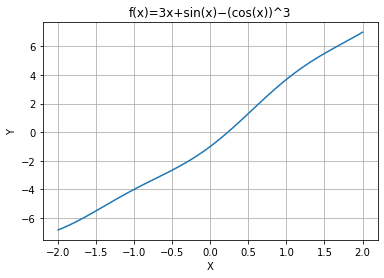

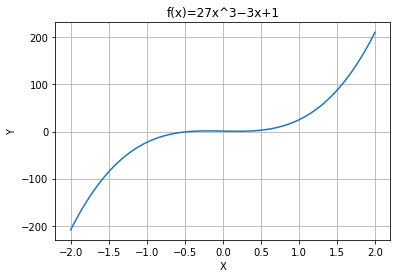

In [7]:
draw_all_diagrams(-2, 2)


###### Przedział (-1, 1)

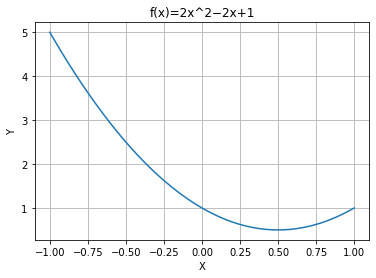

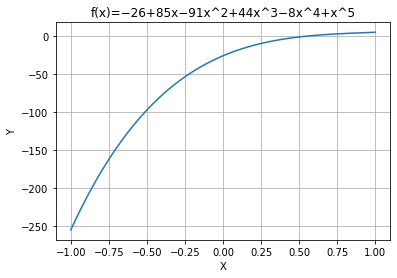

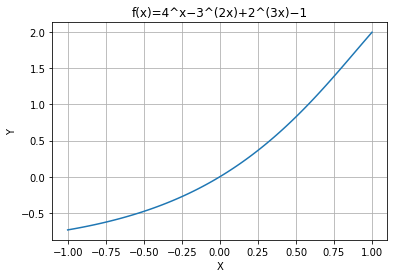

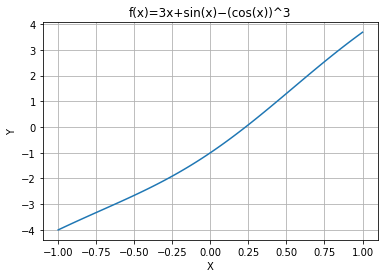

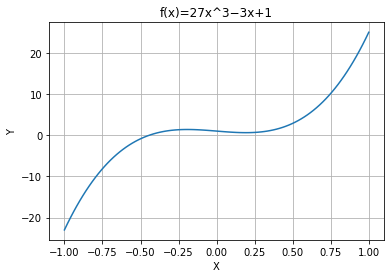

In [8]:
draw_all_diagrams(-1, 1)

#### Wyniki obserwacji
Kwadratowa: (-1, 1) -> Brak rozwiązania  
Wielomianowa: (0, 1)  
Wykładnicza: (-1, 1) -> sprawdzam tylko jedno miejsce zerowe (drugie dla przedziału [1, 2] )   
Trygonometryczna (-1, 1)  
Sześcienna (-1, 1)  

In [9]:
def run_bisection_method():
    # Przedziały dla każdej funkcji znalazłem ręcznie z wykresu
    # draw_diagram(f_kwadratowa, -1, 1, 100, f_kwadratowa_wzor)
    x_0, error = bisection_method(-1, 1, f_kwadratowa, 100)
    print(f_kwadratowa_wzor)
    print("Initial range: [-1, 1]")
    print(f"Root = {x_0}")
    print(f"E = {error} \n")

    
    # draw_diagram(f_wielomianowa, 0, 1, 100, f_wielomianowa_wzor)
    x_0, error = bisection_method(0, 1, f_wielomianowa, 100)
    print(f_wielomianowa_wzor)
    print("Initial range: [0, 1]")
    print(f"Root = {x_0}")
    print(f"E = {error} \n")
    time.sleep(1)

    # draw_diagram(f_wykladnicza, -1, 1, 100, f_wykladnicza_wzor)
    x_0, error = bisection_method(-1, 1, f_wykladnicza, 100)
    print("Initial range: [-1, 1]")
    print(f"Root = {x_0}")
    print(f"E = {error} \n")
    
    # draw_diagram(f_tryg, -1, 1, 100, f_tryg_wzor)
    x_0, error = bisection_method(-1, 1, f_tryg, 100)
    print(f_tryg_wzor)
    print("Initial range: [-1, 1]")
    print(f"Root = {x_0}")
    print(f"E = {error} \n")
    
    # draw_diagram(f_szescienna, -1, 1, 100, f_szescienna_wzor)
    x_0, error = bisection_method(-1, 1, f_szescienna, 100)
    print(f_szescienna_wzor)    
    print("Initial range: [-1, 1]")
    print(f"Root = {x_0}")
    print(f"E = {error} \n")

### Results of Bisection Method

In [10]:
run_bisection_method()

f(x)=2x^2−2x+1
Initial range: [-1, 1]
Root = Not found
E = Not found 

f(x)=−26+85x−91x^2+44x^3−8x^4+x^5
Initial range: [0, 1]
Root = 0.5570255162865259
E = 7.888609052210118e-31 

Initial range: [-1, 1]
Root = 0.0
E = 2.0 

f(x)=3x+sin(x)−(cos(x))^3
Initial range: [-1, 1]
Root = 0.2310996034771355
E = 5.551115123125783e-17 

f(x)=27x^3−3x+1
Initial range: [-1, 1]
Root = -0.4415726524149154
E = 1.5777218104420236e-30 



### Zadanie 2: 
Zaimplementuj metodą Newtona-Raphsona.  Sprawdź jej działanie na powyższych funkcjach testowych. Punkt startowy i przedział poszukiwań dobierz samodzielnie (jakie warunki?). 

##### Zgodnie z wcześniej narysowanymi wykresami, teraz wyznaczamy wartość od której warto zacząć
Kwadratowa: (-1, 1) -> guess: 0 -> Brak rozwiązania  
Wielomianowa: (0, 1) -> guess: 0.5  
Wykładnicza: (-1, 1) -> guess: 0.5 -> sprawdzam tylko jedno miejsce zerowe (drugie dla przedziału [1, 2] )   
Trygonometryczna (-1, 1) -> guess: 0  
Sześcienna (-1, 1) -> guess: -0.5 

In [11]:
def newton_raphson_method(fun, x, n):
    for i in range(n):
        if derivative(fun, x) == 0:
            return "Not found"
        h = fun(x) / derivative(fun, x)
        x = x - h

    return x

def run_newton_raphson_method():
    # draw_diagram(f_kwadratowa, -1, 1, 100, f_kwadratowa_wzor)
    x_0 = newton_raphson_method(f_kwadratowa, 0, 100)
    print(f_kwadratowa_wzor)
    print("Initial guess: 0")
    print(f"Root = {x_0} \n")

    # draw_diagram(f_wielomianowa, 0, 1, 100, f_wielomianowa_wzor)
    x_0 = newton_raphson_method(f_wielomianowa, 0.5, 100)
    print(f_wielomianowa_wzor)
    print("Initial guess: 0.5")
    print(f"Root = {x_0} \n")

    # draw_diagram(f_wykladnicza, -1, 1, 100, f_wykladnicza_wzor)
    x_0 = newton_raphson_method(f_wykladnicza, 0.5, 100)
    print(f_wykladnicza_wzor)
    print("Initial guess: 0.5")
    print(f"Root = {x_0} \n")
    
    # draw_diagram(f_tryg, -1, 1, 100, f_tryg_wzor)
    x_0 = newton_raphson_method(f_tryg, 0, 100)
    print(f_tryg_wzor)
    print("Initial guess: 0")
    print(f"Root = {x_0} \n")
    
    # draw_diagram(f_szescienna, -1, 1, 100, f_szescienna_wzor)
    x_0 = newton_raphson_method(f_szescienna, -0.5, 100)
    print(f_szescienna_wzor)
    print("Initial guess: -0.5")
    print(f"Root = {x_0} \n")

### Results of Newton-Raphson Method

In [12]:
run_newton_raphson_method()

f(x)=2x^2−2x+1
Initial guess: 0
Root = Not found 

f(x)=−26+85x−91x^2+44x^3−8x^4+x^5
Initial guess: 0.5
Root = 0.5570255162865257 

f(x)=4^x−3^(2x)+2^(3x)−1
Initial guess: 0.5
Root = -7.520377873581182e-18 

f(x)=3x+sin(x)−(cos(x))^3
Initial guess: 0
Root = 0.2310996034771355 

f(x)=27x^3−3x+1
Initial guess: -0.5
Root = -0.4415726524149154 



### Zadanie 3: 
Zaimplementuje metodę siecznych (Eulera). Przedział poszukiwań dobierz samodzielnie (jakie warunki?). 

In [13]:
def secant_method(fun, x0, x1, n):
    if fun(x0) * fun(x1) >= 0 or n <= 0 or x0 >= x1:
        return "No root found"

    for i in range(n):
        x2 = x1 - (fun(x1) * (x1 - x0)) / (fun(x1) - fun(x0))
        x0, x1 = x1, x2

    return x2

def run_secant_method():
    # draw_diagram(f_kwadratowa, -1, 1, 100, f_kwadratowa_wzor)
    x_0 = secant_method(f_kwadratowa, -1, 1, 100)
    print(f_kwadratowa_wzor)
    print("Initial range: (-1, 1)")
    print(f"Root = {x_0} \n")

    # draw_diagram(f_wielomianowa, 0, 1, 100, f_wielomianowa_wzor)
    x_0 = secant_method(f_wielomianowa, 0, 1.1, 10)
    print(f_wielomianowa_wzor)
    print("Initial range: (0, 1.1)")
    print(f"Root = {x_0} \n")

    # draw_diagram(f_wykladnicza, -1, 1, 100, f_wykladnicza_wzor)
    x_0 = secant_method(f_wykladnicza, -1, 1.1, 10)
    print(f_wykladnicza_wzor)
    print("Initial range: (-1, 1.1)")
    print(f"Root = {x_0} \n")
    
    # draw_diagram(f_tryg, -1, 1, 100, f_tryg_wzor)
    x_0 = secant_method(f_tryg, 0, 0.5, 5)
    print(f_tryg_wzor)
    print("Initial range: (0, 0.5)")
    print(f"Root = {x_0} \n")
    
    # draw_diagram(f_szescienna, -1, 1, 100, f_szescienna_wzor)
    x_0 = secant_method(f_szescienna,-1 , 1, 10)
    print(f_szescienna_wzor)
    print("Initial range: (-1, 1)")
    print(f"Root = {x_0} \n")
        
        

### Results of Sectant Method

In [14]:
run_secant_method()

f(x)=2x^2−2x+1
Initial range: (-1, 1)
Root = No root found 

f(x)=−26+85x−91x^2+44x^3−8x^4+x^5
Initial range: (0, 1.1)
Root = 0.5570255162865261 

f(x)=4^x−3^(2x)+2^(3x)−1
Initial range: (-1, 1.1)
Root = 3.1061288714523294e-17 

f(x)=3x+sin(x)−(cos(x))^3
Initial range: (0, 0.5)
Root = 0.23109960347713526 

f(x)=27x^3−3x+1
Initial range: (-1, 1)
Root = 0.05967940354195855 



###### Komentarz:
Bardzo trudno jest dobrać odpowiedni przedział i liczbę iteracji  
-> zarówno przedział jak i liczba iteracji muszą być jak najmniejsze, inaczej nieopędzimy się od błędów dzielenia przez 0 


### Zadanie 4: 
Wybierz jedną z metod rozwiązywania równań nieliniowych dostępna w bibliotece numpy lub scipy.  
Porównaj dokładność wszystkiech czterech metod.

In [15]:
def comparison(fun, a, b, n, fun_name):
    ref = opt.bisect(fun, a, b)  # used as reference value
    b_m = bisection_method(a, b, fun, n)[0]
    n_r = newton_raphson_method(fun, b, n)
    s_m = secant_method(fun, a, b, n)

    print(f"Function {fun_name}, range: [{a}, {b}]")
    res = [["SciPy bisection method", ref, 0, 0],
           ["Bisection method", b_m, (abs(b_m - ref) / abs(ref))*100, abs(ref - b_m)],
           ["Newton-Raphson method", n_r, (abs(n_r - ref) / abs(ref))*100, abs(ref - n_r)],
           ["Secant method", s_m, (abs(s_m - ref) / abs(ref))*100, abs(ref - s_m)]]

    print(tabulate(res, headers=["Method", "Value", "Relative error [%]", "Absolute error"], tablefmt="grid") )
    print("\n")

def run_all_comparisons():
    # Pomijam kwadratową bo nie ma nie ma rozwiązania
    # comparison(f_kwadratowa, -1, 1, 10, f_kwadratowa_wzor) 
    comparison(f_wielomianowa, 0, 1.1, 10, f_wielomianowa_wzor)
    comparison(f_wykladnicza, -1, 1.1, 10, f_wykladnicza_wzor)
    comparison(f_tryg, 0, 0.5, 5, f_tryg_wzor)
    comparison(f_szescienna, -1, 1, 10, f_szescienna_wzor)

    

In [16]:
run_all_comparisons()


Function f(x)=−26+85x−91x^2+44x^3−8x^4+x^5, range: [0, 1.1]
+------------------------+----------+----------------------+------------------+
| Method                 |    Value |   Relative error [%] |   Absolute error |
+========================+==========+======================+==================+
| SciPy bisection method | 0.557026 |          0           |      0           |
+------------------------+----------+----------------------+------------------+
| Bisection method       | 0.55752  |          0.088688    |      0.000494015 |
+------------------------+----------+----------------------+------------------+
| Newton-Raphson method  | 0.561121 |          0.73528     |      0.0040957   |
+------------------------+----------+----------------------+------------------+
| Secant method          | 0.557026 |          5.46914e-11 |      3.04645e-13 |
+------------------------+----------+----------------------+------------------+


Function f(x)=4^x−3^(2x)+2^(3x)−1, range: [-1, 1.1]
+-----